<a href="https://colab.research.google.com/github/NikSh1891/Data_Analyst_Portfolio/blob/main/E_commerce_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# E-commerce data

Продакт-менеджер Василий попросил вас проанализировать совершенные покупки и ответить на следующие вопросы:

1. Сколько у нас пользователей, которые совершили покупку только один раз?

2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

3. По каждому товару определить, в какой день недели товар чаще всего покупается.

4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров.

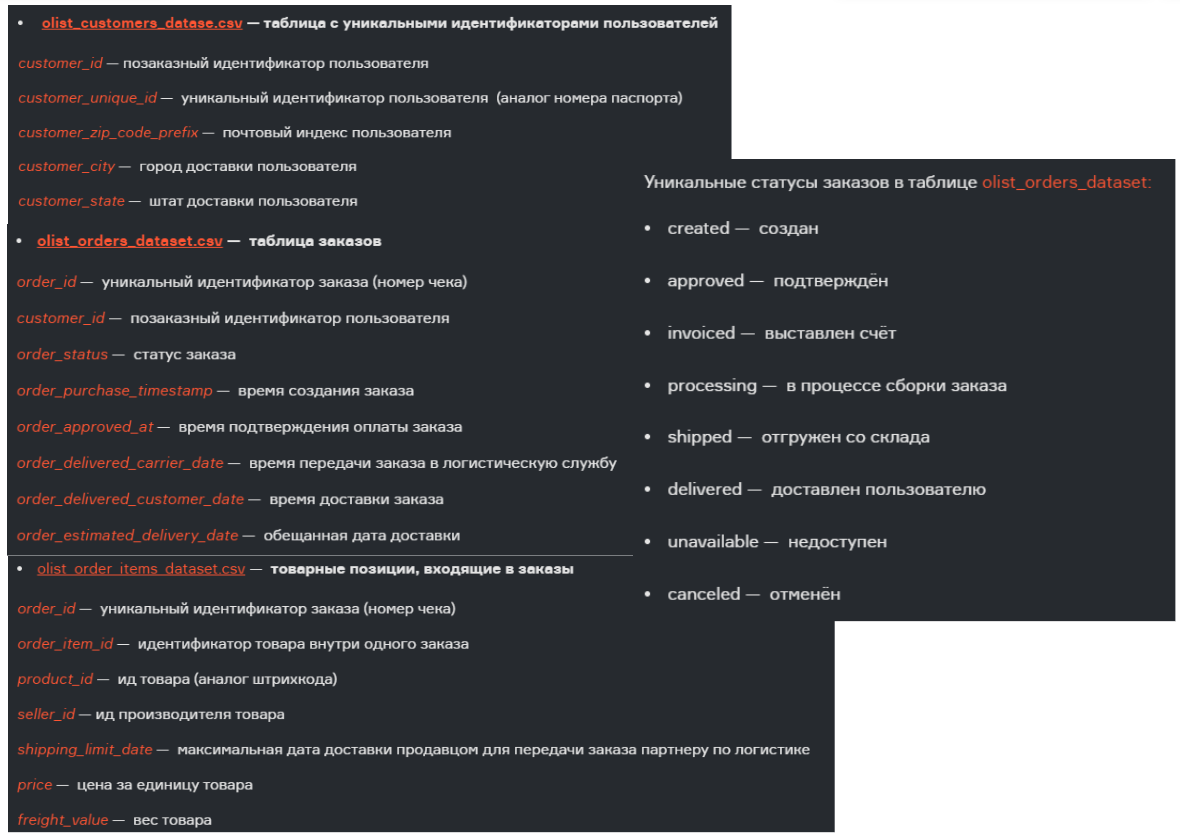

## Импорт библиотек

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import requests
from urllib.parse import urlencode
from datetime import datetime
import calendar
import warnings
warnings.filterwarnings("ignore")

Функция для выгрузки данных через API

In [ ]:
def url(public_key):
    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
    final_url = base_url + urlencode(dict(public_key=public_key))
    response_active = requests.get(final_url)
    download_url = response_active.json()['href']
    return download_url

## Импорт данных

In [ ]:
a = url('https://disk.yandex.ru/d/QXrVDUoQvFhIcg')
customers_data = pd.read_csv(a, sep=',')
customers_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
b = url('https://disk.yandex.ru/d/0zWmh1bYP6REbw')
orders_data = pd.read_csv(b, sep=',')
orders_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
c = url('https://disk.yandex.ru/d/xCsQ0FiC-Ue4Lg')
items_data = pd.read_csv(c, sep=',')
items_data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


## Предварительный анализ данных

In [ ]:
# Размер датасетов
print(customers_data.shape[0])
print(orders_data.shape[0])
print(items_data.shape[0])

99441
99441
112650


### Проверка на пропуски и типы данных в столбцах

In [ ]:
customers_data.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Пропусков в данных о клиентах не обнаружено

In [ ]:
orders_data.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Имеются пропуски в данных о датах заказов, в столбцах
- `order_approved_at`
- `order_delivered_carrier_date`
- `order_delivered_customer_date`


In [ ]:
items_data.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Проспусков в данных о товарах не обнаружено

#### Проанализируем пропуски в данных о заказах

In [ ]:
# Создадим датафрейм с данными о пропусках в столбце времени подтверждения оплаты заказа(order_approved_at)
order_approved_at_NA = orders_data.loc[orders_data.order_approved_at.isna() == True]
# Посмотрим на статусы заказов с отсутствием времени подтверждения оплаты
order_approved_at_NA.order_status.value_counts()

canceled     141
delivered     14
created        5
Name: order_status, dtype: int64

- Пропуски со статусом `canceled` можно объяснить тем что пользователь отменил заказ - следовательно оплаты и не должно быть.
- Пропуски со статусом `created` говорит о том что заказ создан но на момент выгрузки данных из базы не оплачен.
- Почему есть заказы без подтверждения оплаты, но со статусом `delivered`?

In [ ]:
# Рассмотрим детальнее заказы без подтверждения оплаты со статусом delivered
order_approved_at_NA[order_approved_at_NA['order_status'] == 'delivered']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaN,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17 00:00:00
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaN,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21 00:00:00
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaN,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17 00:00:00
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaN,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31 00:00:00
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaN,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20 00:00:00
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaN,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01 00:00:00
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaN,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27 00:00:00
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaN,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22 00:00:00
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaN,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16 00:00:00
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaN,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20 00:00:00


У всех заказов без подтверждения оплаты со статусом delivered есть зафиксированное время доставки товара до покупателя. Значит товар благополучно добрался по клиента при отсутствии данных об оплате. Для установления точной причины отсутствия данных о подтверждении нужно запросить дополнительную информацию по данным заказам. Были ли сбои в системе логирования в эти даты. Либо возможно эти заказы были осуществлены в рамках какой либо акции постоянным клиентам без оплаты, либо розыгрыша призов.

Т.к. пропусков 14 шт и они являются малой частью данных, можем удалить их из данных и не учитывать в дальнейшем анализе.

In [ ]:
# Удалим пропуски order_approved_at со статусом delivered из данных
orders_data = orders_data.drop(orders_data[(orders_data['order_status'] == 'delivered') & (orders_data['order_approved_at'].isna())].index)
orders_data.shape

(99427, 8)

In [ ]:
# Создадим датафрейм с данными о пропусках в столбце времени передачи заказа в логистическую службу(order_delivered_carrier_date)
order_delivered_carrier_date_NA = orders_data.loc[orders_data.order_delivered_carrier_date.isna() == True]
# Посмотрим на статусы заказов с отсутствием времени передачи заказа в логистическую службу
order_delivered_carrier_date_NA.order_status.value_counts()

unavailable    609
canceled       550
invoiced       314
processing     301
created          5
approved         2
delivered        2
Name: order_status, dtype: int64

Все полученные статусы объясняют отсутствие времени передачи заказа в логистическую службу. Они до нее еще не дошли.\
Кроме заказов со статусом `delivered`

In [ ]:
# Рассмотрим детальнее заказы без времени передачи заказа в логистическую службу со статусом delivered
order_delivered_carrier_date_NA[order_delivered_carrier_date_NA['order_status'] == 'delivered']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaN,2017-11-20 19:44:47,2017-11-14 00:00:00
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaN,NaN,2017-06-23 00:00:00


Один заказ имеет и время подтвеждения оплаты и время доставки клиенту.\
Второй заказ не имеет зафиксированного времени передачи заказа клиенту, но имеет время подтверждения оплаты.\
Т.к. данные противоречивы. Для объяснения причин отсутствия данных о времени передачи товара в логистическую службу нужно запрашивать дополнительную информацию. Например наблюдались ли сбои в системе логирования в данное время.\
Т.к. данных мало, отсутствие данных строк не повлияет на дальнейший анализ. Удалим эти записи.

In [ ]:
# Удалим пропуски order_delivered_carrier_date со статусом delivered из данных
orders_data = orders_data.drop(orders_data[(orders_data['order_status'] == 'delivered') & (orders_data['order_delivered_carrier_date'].isna())].index)
orders_data.shape

(99425, 8)

In [ ]:
# Создадим датафрейм с данными о пропусках в столбце времени доставки заказа клиенту(order_delivered_customer_date)
order_delivered_customer_date_NA = orders_data.loc[orders_data.order_delivered_customer_date.isna() == True]
# Посмотрим на статусы заказов с отсутствием времени передачи заказа в логистическую службу
order_delivered_customer_date_NA.order_status.value_counts()

shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         7
created           5
approved          2
Name: order_status, dtype: int64

Отсутствие времени доставки заказа клиенту согласуется со всеми полученными статусами заказов, кроме статуса `delivered`

In [ ]:
# Рассмотрим детальнее заказы без времени доставки заказа клиенту со статусом delivered
order_delivered_customer_date_NA[order_delivered_customer_date_NA['order_status'] == 'delivered']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaN,2017-12-18 00:00:00
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaN,2018-07-16 00:00:00
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaN,2018-07-30 00:00:00
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaN,2018-07-30 00:00:00
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaN,2018-07-24 00:00:00
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaN,2018-06-26 00:00:00
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaN,2018-07-19 00:00:00


У всех заказов есть время подтверждения оплаты, значит заказы оплачены но не зафиксировано время доставки. Возможно это ошибка системы логирования, для объяснения причин нужно запрашивать дополнительную информацию. Допустим были ли сбои в это время.
Т.к. данных мало, отсутствие данных строк не повлияет на дальнейший анализ. Удалим эти записи.

In [ ]:
# Удалим пропуски order_delivered_customer_date со статусом delivered из данных
orders_data = orders_data.drop(orders_data[(orders_data['order_status'] == 'delivered') & (orders_data['order_delivered_customer_date'].isna())].index)
orders_data.shape

(99418, 8)

### Объединение датасетов

In [ ]:
# Проверим кол-во уникальных позаказных идентификаторов пользователя в данных о покупателях и о покупках, т.к. в дальнейшем будем объединять датафреймы по этому ключу
print(customers_data.customer_id.nunique())
print(orders_data.customer_id.nunique())

99441
99418


In [ ]:
# Объединим данные о покупателях и о покупках
customers_orders = customers_data.merge(orders_data, how='left', on='customer_id')
customers_orders.shape

(99441, 12)

In [ ]:
# Проверим кол-во уникальных идентификаторов заказов в данных о покупателях и покупках и данных о товарах, т.к. в дальнейшем будем объединять датафреймы по этому ключу
print(customers_orders.order_id.nunique())
print(items_data.order_id.nunique())

99418
98666


In [ ]:
# Сформируем окончательный датафрейм
DF = customers_orders.merge(items_data, how='inner', on='order_id')
print(DF.shape)
DF.head()

(112626, 18)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


### Поиск и удаление дубликатов

In [ ]:
print(DF.shape)
DF.drop_duplicates()
print(DF.shape)

(112626, 18)
(112626, 18)


### Типы данных

In [ ]:
DF[['shipping_limit_date', 'order_purchase_timestamp', 'order_approved_at',
    'order_delivered_carrier_date', 'order_delivered_customer_date',
    'order_estimated_delivery_date']] = DF[['shipping_limit_date', 'order_purchase_timestamp',
                                            'order_approved_at', 'order_delivered_carrier_date',
                                            'order_delivered_customer_date', 'order_estimated_delivery_date']].apply(pd.to_datetime)

In [ ]:
DF.dtypes

customer_id                              object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
dtype: object

## Что будем считать покупкой?

Покупкой будем считать все заказы за исключением заказов со статусами: `created`, `unavailable`, `canceled`.

In [ ]:
DF.order_status.value_counts()

delivered      110173
shipped          1185
canceled          542
invoiced          359
processing        357
unavailable         7
approved            3
Name: order_status, dtype: int64

In [ ]:
## Данные только с покупками
DF_purchase = DF.query("order_status != 'canceled' & order_status != 'unavailable' & order_status != 'created'")
# Проверим получившийся датасет
DF.shape[0] - DF_purchase.shape[0] == DF[DF['order_status'] == 'canceled'].shape[0] + DF[DF['order_status'] == 'unavailable'].shape[0] + DF[DF['order_status'] == 'created'].shape[0]

True

## Определим количество пользователей соверших покупку один раз?

In [ ]:
print('Кол-во пользователей совершивших покупку один раз: ', DF_purchase.groupby('customer_unique_id', as_index=False)
                                                                        .agg({'order_id': 'nunique'})
                                                                        .value_counts('order_id')
                                                                        .head(1)[1])

Кол-во пользователей совершивших покупку один раз:  92075


## Определим сколько заказов в месяц в среднем не доставляется по разным причинам (с детализацией по причинам)

Недоставленные заказы это все заказы кроме:
- заказов со статусами `delivered`
- заказов у которых есть ненулевое значение в столбце `order_delivered_customer_date`

In [ ]:
# Исключим заказы со статусом "delivered" и исключим заказы в которых есть какое либо значение в "order_delivered_customer_date"
avg_order_not_delivered = DF[(DF['order_status'] != 'delivered') & (DF['order_delivered_customer_date'].isnull())]
print(avg_order_not_delivered.shape[0], '\n')
avg_order_not_delivered.isnull().sum()

2446 



customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1192
order_delivered_customer_date    2446
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
dtype: int64

In [ ]:
# Добавим столбец с датой в формате год-месяц
avg_order_not_delivered['order_approved_at'] = pd.to_datetime(avg_order_not_delivered['order_approved_at'])
avg_order_not_delivered['year_month'] = avg_order_not_delivered['order_approved_at'].dt.strftime('%Y-%m')

In [ ]:
# Посчитаем кол-во уникальных заказов для каждого месяца в разрезе статуса заказа
avg_order_not_delivered = avg_order_not_delivered.groupby(['order_status', 'year_month'], as_index=False).agg({'order_id': 'nunique'})
# Посчитаем среднее количество недоставленных заказов в месяц с детализацией по причинам
avg_order_not_delivered.groupby('order_status', as_index=False).agg({'order_id': 'mean'})

,order_status,order_id
0,approved,1.000000
1,canceled,21.666667
2,invoiced,14.857143
3,processing,15.842105
4,shipped,50.272727
5,unavailable,6.000000


**Выводы**\
В среднем 50 заказов отгружаются со склада но не доезжают до клиента в текущем месяце. Это может быть связанно с тем что заказы передаются в конце месяца и запланированная дата доставки приходится на следующий месяц, занчил не учитывается в анализе данного вопроса. \
В среднем 21 заказ отменяется. \   
По 14ти заказам только выставляется счет. \
15 заказов в процессе сборки. \


## Определим по каждому товару, в какой день недели он чаще всего покупается.

In [ ]:
# Отфильтруем нужные столбцы
day_purchase_frequency = DF_purchase[['product_id', 'order_approved_at']]
# Добавим столбец с номером дня недели
day_purchase_frequency['day_number'] = day_purchase_frequency['order_approved_at'].dt.strftime('%w')
day_purchase_frequency['day_number'] = day_purchase_frequency['day_number'].astype('int')

In [ ]:
# Сгруппируем данные по id товара и выведем моду(самое частоповторяющееся значение) по каждому товару
day_purchase_frequency.groupby('product_id', as_index=False)['day_number'].agg(pd.Series.mode).head()

,product_id,day_number
0,00066f42aeeb9f3007548bb9d3f33c38,0
1,00088930e925c41fd95ebfe695fd2655,2
2,0009406fd7479715e4bef61dd91f2462,5
3,000b8f95fcb9e0096488278317764d19,"[3, 5]"
4,000d9be29b5207b54e86aa1b1ac54872,2


## Определим у каждого из пользователей среднее количество покупок в неделю (по месяцам)

Внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

In [ ]:
# Оставим только 3 столбца с ID пользователя, ID заказа, датой оплаты
amsr = DF_purchase[['customer_unique_id', 'order_id', 'order_approved_at']]
amsr.head(1)

,customer_unique_id,order_id,order_approved_at
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:22:12


In [ ]:
# Добавим столбец с обозначением год-месяц
amsr['year_month'] = amsr['order_approved_at'].dt.to_period('M')
amsr.head()

,customer_unique_id,order_id,order_approved_at,year_month
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:22:12,2017-05
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:58:32,2018-01
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-20 16:19:10,2018-05
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 17:29:19,2018-03
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 10:10:09,2018-07


In [ ]:
# Добавим столбец с кол-вом недель в соответствующем месяце
amsr['week_in_month'] = amsr['order_approved_at'].apply(lambda x: calendar.monthrange(x.year, x.month)[1]/7)
# И округлим получившиеся значения
amsr['week_in_month'] = amsr['week_in_month'].round(2)

In [ ]:
# Сгруппируем данные и получим кол-во покупок по каждому пользователю
amsr = amsr.groupby(['customer_unique_id', 'year_month', 'week_in_month'], as_index=False).agg({'order_id': 'nunique'})
amsr.head()

,customer_unique_id,year_month,week_in_month,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,4.43,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,4.43,1
2,0000f46a3911fa3c0805444483337064,2017-03,4.43,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,4.43,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11,4.29,1


In [ ]:
# Добавим столбец со средним количеством покупок в неделю по каждому пользователю
amsr['average_week_orders'] = amsr['order_id'] / amsr['week_in_month']
amsr.sort_values('average_week_orders', ascending=False).head(10)

,customer_unique_id,year_month,week_in_month,order_id,average_week_orders
7232,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01,4.43,6,1.354402
61430,a239b8e2fbce33780f1f1912e2ee5275,2017-02,4.00,4,1.000000
68533,b4e4f24de1e8725b74e4a1f4975116ed,2018-02,4.00,4,1.000000
23643,3e43e6105506432c953e165fb2acf44c,2018-02,4.00,4,1.000000
14307,25a560b9a6006157838aab1bdbd68624,2017-04,4.29,4,0.932401
66916,b08fab27d47a1eb6deda07bfd965ad43,2017-09,4.29,4,0.932401
50002,83e7958a94bd7f74a9414d8782f87628,2017-01,4.43,4,0.902935
75847,c8460e4251689ba205045f3ea17884a1,2018-08,4.43,4,0.902935
80183,d3882d7abd0c66064d740d7ed04dd1ef,2018-02,4.00,3,0.750000
14408,25f3cf83109f636d52d288fa4e797111,2018-02,4.00,3,0.750000


**Выводы**

Только у одного пользователя среднее кол-во покупок превышает 1 в неделю. У троих пользователей этот показатель равен 1. У остальных пользователей менее одной покупки в неделю. \
Полученные результаты говорят о низкой увлеченности пользователей предлагаемыми товарами, возможно можно направить ресурсы на расширение ассортимента либо искать причины нижкой активности в качестве сервиса после покупки. \
Так же это говорит о низком уровне удержания клиентов, в основном клиент купивший один раз, не возвращается для совершения покупок в дальнейшем. Что то в деятельности компании не устраивает клиентов. \
Возможно следует направить ресурсы на маркетинговые акции для стимулирования кол-ва покупок. \

## Проведем когортный анализ пользователей.  Выявим за период с января по декабрь когорту с самым высоким retention на 3й месяц.

Период с января по декабрь есть только в 2017 г.

In [ ]:
# Отфильтруем данные
CAR = DF_purchase.loc[(DF_purchase['order_approved_at'] >= '2017-01-01') & (DF_purchase['order_approved_at'] <= '2017-12-31')]
CAR = CAR[['customer_unique_id', 'order_id', 'order_approved_at']]
print(CAR.shape[0])
CAR.head()

50471


,customer_unique_id,order_id,order_approved_at
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:22:12
5,4c93744516667ad3b8f1fb645a3116a4,5741ea1f91b5fbab2bd2dc653a5b5099,2017-09-14 18:25:11
7,57b2a98a409812fe9618067b6b8ebe4f,1093c8304c7a003280dd34598194913d,2017-11-16 19:55:41
10,2a7745e1ed516b289ed9b29c7d0539a5,8428e578bb1cf839ae26a6b7615502b9,2017-11-27 18:01:20
12,918dc87cd72cd9f6ed4bd442ed785235,83d8f70418eefd96f37b483dff430305,2017-09-09 10:10:17


In [ ]:
CAR = CAR.drop_duplicates('order_id')

In [ ]:
# Сгруппируем данные по id пользователя и вычислим дату первой покупки
first_by_data = CAR.groupby('customer_unique_id', as_index=False)['order_approved_at'].agg('min')
# Довавим столбце с наименованием когорты
first_by_data['cog_name'] = pd.to_datetime(first_by_data['order_approved_at']).dt.strftime('%Y-%m')
print(first_by_data.shape[0])
first_by_data = first_by_data.rename(columns={'order_approved_at': 'first_purchase_date'})
first_by_data.head()

42895


,customer_unique_id,first_purchase_date,cog_name
0,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03
1,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:49:17,2017-10
2,0004aac84e0df4da2b147fca70cf8255,2017-11-14 20:06:52,2017-11
3,0005e1862207bf6ccc02e4228effd9a0,2017-03-04 23:43:26,2017-03
4,0006fdc98a402fceb4eb0ee528f6a8d4,2017-07-18 09:30:22,2017-07


In [ ]:
# Объединим данные исходного датасета с данными о первой покупке и наименованием когорты
fin_data = CAR.merge(first_by_data, how='left', on='customer_unique_id')

In [ ]:
# Посчитаем разницу в днях между датой покупки и датой первой покупки
fin_data['time_diff'] = fin_data['order_approved_at'] - fin_data['first_purchase_date']

In [ ]:
# Рассчитаем общее кол-во пользователей в каждой когорте
all_users_cog = fin_data.groupby('cog_name', as_index=False).agg({'order_id': 'nunique'})
all_users_cog

,cog_name,order_id
0,2017-01,770
1,2017-02,1732
2,2017-03,2690
3,2017-04,2394
4,2017-05,3711
5,2017-06,3237
6,2017-07,3911
7,2017-08,4305
8,2017-09,4234
9,2017-10,4465


In [ ]:
# Оставим только те строки где разница между датой первой покупки и датой покупки более или равно 90 дней(3 месяца). Сохраним получившиеся данные в датафрейм.
convert_users = fin_data.loc[fin_data['time_diff'] >= '90 days']
convert_users

,customer_unique_id,order_id,order_approved_at,first_purchase_date,cog_name,time_diff
245,87a7c3090f96d9da963125a0d7f8193a,c7331c9cf37d4a3f6b0fbf4bf4c543a8,2017-06-12 16:55:19,2017-02-09 14:10:19,2017-02,123 days 02:45:00
268,4e65032f1f574189fb793bac5a867bbc,0136390286be8a34efdc801ed150568f,2017-07-16 12:35:15,2017-03-26 18:50:26,2017-03,111 days 17:44:49
366,4b384b778ebc0449d0244902bfce7beb,f698a227c98dd9263f510f1cbdda7985,2017-11-19 14:46:42,2017-06-22 20:15:15,2017-06,149 days 18:31:27
746,2b775b75afa0be08220fb73a7e68df3b,9f67054716b5806d7ecb46b0f309e5c3,2017-10-30 21:31:41,2017-06-23 21:50:08,2017-06,128 days 23:41:33
765,4bbaf6f7a10a7e26a8777aa5cb6d5864,a52f0272f9150859ede915bb2eef1bf9,2017-11-14 03:30:17,2017-02-05 19:01:52,2017-02,281 days 08:28:25
...,...,...,...,...,...,...
43564,da5bbfd583efb762f6fda762f1aaf4a9,0bca8e07f15636c260b1f794be423ad9,2017-04-27 13:32:51,2017-01-24 15:35:15,2017-01,92 days 21:57:36
43779,4897a3c64a635a703a71dd2d9189bffa,2da6ebf3d4e564ca7ed21893aa78d820,2017-09-29 09:28:16,2017-04-14 13:45:22,2017-04,167 days 19:42:54
43878,0fd475edfa0b61c59ecde6f89c21dedb,e91e4fa5f881fa870e71c30c2c1921d5,2017-12-28 02:33:38,2017-08-15 16:55:19,2017-08,134 days 09:38:19
43893,194be31520cde5c527bad17720119e85,18bafb91a9e78b83e54eb5aa495a955f,2017-08-14 12:50:12,2017-04-07 13:06:05,2017-04,128 days 23:44:07


In [ ]:
# Сгруппируем данные о сконвертировавшися пользователях по наименованию когорты и посчитаем кол-во заказов в каждой когорте
a = convert_users.groupby('cog_name', as_index=False).agg({'order_id': 'nunique'})
a

,cog_name,order_id
0,2017-01,14
1,2017-02,24
2,2017-03,39
3,2017-04,35
4,2017-05,56
5,2017-06,35
6,2017-07,27
7,2017-08,23
8,2017-09,6


In [ ]:
# Объединим данные о сконвертировавшихся пользователях с данными с когортами и общим кол-вом пользователей
b = all_users_cog.merge(a, how='left', on='cog_name')
# Посчитаем  retention rate
b['retention_rate'] = b['order_id_y'] / b['order_id_x'] * 100
b['retention_rate'] = b['retention_rate'].round(2)
b.sort_values('retention_rate', ascending=False)

,cog_name,order_id_x,order_id_y,retention_rate
0,2017-01,770,14.0,1.82
4,2017-05,3711,56.0,1.51
3,2017-04,2394,35.0,1.46
2,2017-03,2690,39.0,1.45
1,2017-02,1732,24.0,1.39
5,2017-06,3237,35.0,1.08
6,2017-07,3911,27.0,0.69
7,2017-08,4305,23.0,0.53
8,2017-09,4234,6.0,0.14
9,2017-10,4465,NaN,NaN


**Выводы** \

Пользователи сделавшие первую покупку в январе имеют наибольший показатель возвращаемости на 3й месяц.

## RFM-сегментация пользователей

In [ ]:
DF_purchase.sample()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
48056,36d3603a054c833fae1410c2bea687ae,7e9a6d294183b65ac05b4846154d3eee,12242,sao jose dos campos,SP,6dad10eaed0900d63501e1c436408bf6,delivered,2018-03-19 12:45:46,2018-03-20 03:30:44,2018-03-20 19:48:49,2018-03-28 23:12:32,2018-04-11,2,a4f025732d994e8a34d695a45282f299,0241d4d5d36f10f80c644447315af0bd,2018-03-26 03:30:44,99.0,23.27


In [ ]:
# Подготовим данные
rfm_data = DF_purchase[['customer_unique_id', 'order_id', 'order_approved_at', 'price']]
rfm_data.head()

,customer_unique_id,order_id,order_approved_at,price
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:22:12,124.99
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:58:32,289.00
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-20 16:19:10,139.94
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 17:29:19,149.94
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 10:10:09,230.00


In [ ]:
# Будем считать текущей датой дату последней покупки
now = rfm_data.order_approved_at.max()

In [ ]:
# Cформируем столбцы с показателями давность покупки, частота покупок, сумма покупок
rfm_data = rfm_data.groupby('customer_unique_id', as_index=False)\
                  .agg({'order_approved_at': lambda x: (now - x.max()).days,
                        'order_id': lambda x: x.nunique(),
                        'price': lambda x: x.sum()
                      })
rfm_data = rfm_data.rename(columns={'order_approved_at': 'recency',
                                    'order_id': 'frequency',
                                    'price': 'monetary'
                                    })
rfm_data.head()

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90
2,0000f46a3911fa3c0805444483337064,541,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00


In [ ]:
# Рассмотрим процентили критериев
print(rfm_data['recency'].quantile([0, .25, .50, .75, 1]))
print(rfm_data['frequency'].quantile([0, .25, .50, .75, 1]))
print(rfm_data['monetary'].quantile([0, .25, .50, .75, 1]))

0.00      0.0
0.25    118.0
0.50    223.0
0.75    352.0
1.00    718.0
Name: recency, dtype: float64
0.00     1.0
0.25     1.0
0.50     1.0
0.75     1.0
1.00    16.0
Name: frequency, dtype: float64
0.00        0.85
0.25       47.90
0.50       89.87
0.75      155.00
1.00    13440.00
Name: monetary, dtype: float64


In [ ]:
# Подсчитаем частоту уникальных значений в столбце частота покупок
rfm_data['frequency'].value_counts()

1     92075
2      2650
3       188
4        29
5         9
6         5
7         3
9         1
16        1
Name: frequency, dtype: int64

Исходя из имеющихся данных будем проставлять следующие оценки нашим критериям:\
`recency` - от 4 до 1 балла, где балл 4 это недавние покупки, а 1 это самые давние покупки;\
`monetary` - от 1 до 4 баллов, где 1 балл это покупки на небольшую сумму, а 4 балла это покупки на самые крупные суммы;\
`frequency` - т.к. частота покупок с помошью процентилей делится не лучшим образом, будем проставлять баллы следущим образом:\
одна покупка - 1 балл\
2 покупки - 2 балла\
от 3 покупок - 3 балла\
      .



In [ ]:
recency = rfm_data['recency'].quantile([0, .25, .50, .75, 1]).tolist()
frequency = rfm_data['frequency'].value_counts().index.tolist()
monetary = rfm_data['monetary'].quantile([0, .25, .50, .75, 1]).tolist()

In [ ]:
print(recency)
print(frequency)
print(monetary)

[0.0, 118.0, 223.0, 352.0, 718.0]
[1, 2, 3, 4, 5, 6, 7, 9, 16]
[0.85, 47.9, 89.87, 155.0, 13440.0]


In [ ]:
# Создадим функции для присваивания баллов по критериям
def f_rscore(x):
  if x >= recency[0] and x < recency[1]:
    return 4
  elif x >= recency[1] and x < recency[2]:
    return 3
  elif x >= recency[2] and x < recency[3]:
    return 2
  else:
    return 1

def f_fscore(x):
  if x == frequency[0]:
    return 1
  elif x == frequency[1]:
    return 2
  else:
    return 3

def f_mscore(x):
  if x >= monetary[0] and x < monetary[1]:
    return 1
  elif x >= monetary[1] and x < monetary[2]:
    return 2
  elif x >= monetary[2] and x < monetary[3]:
    return 3
  else:
    return 4

In [ ]:
# Присвоим баллы
rfm_data['r_score'] = rfm_data['recency'].apply(f_rscore)
rfm_data['f_score'] = rfm_data['frequency'].apply(f_fscore)
rfm_data['m_score'] = rfm_data['monetary'].apply(f_mscore)

In [ ]:
# Добавим столбец с наименованием кластера
rfm_data['RFM_score'] = (
                        rfm_data['r_score'].astype('str')
                        + rfm_data['f_score'].astype('str')
                        + rfm_data['m_score'].astype('str')
                        )

In [ ]:
rfm_data.RFM_score.value_counts().to_frame()

,RFM_score
212,6146
111,6061
311,5979
313,5936
112,5906
411,5820
213,5780
211,5768
413,5758
312,5667
